##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **PRJNA907381**

Files were previously downloaded by Xiaohan for me, can be found in /QRISdata/Q6104/cellranger/out

Transferred the h5 file's from each sample to my rdm/scratch, these were all named: 

* filtered_feature_bc_matrix.h5

I added the prefix of the patient id to each: 

* SRR22490097_filtered_feature_bc_matrix.h5
* SRR22490098_filtered_feature_bc_matrix.h5
* SRR22490099_filtered_feature_bc_matrix.h5
* SRR22490100_filtered_feature_bc_matrix.h5
* SRR22490101_filtered_feature_bc_matrix.h5
* SRR22490102_filtered_feature_bc_matrix.h5
* SRR22490103_filtered_feature_bc_matrix.h5
* SRR22490104_filtered_feature_bc_matrix.h5

Dataset should contain 5 tumour affected and 3 unaffected LNs from melanoma (ie. 5 mets and 3 healthy)


In [7]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/PRJNA907381')
getwd()

[1] "/scratch/user/s4436039/scdata/PRJNA907381"

[1] "/scratch/user/s4436039/scdata/PRJNA907381"

In [8]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)

In [9]:
library(hdf5r)

In [10]:
#load all datasets
MEL097.data <- Read10X_h5("SRR22490097_filtered_feature_bc_matrix.h5")
MEL098.data <- Read10X_h5("SRR22490098_filtered_feature_bc_matrix.h5")
MEL099.data <- Read10X_h5("SRR22490099_filtered_feature_bc_matrix.h5")
MEL100.data <- Read10X_h5("SRR22490100_filtered_feature_bc_matrix.h5")
MEL101.data <- Read10X_h5("SRR22490101_filtered_feature_bc_matrix.h5")
MEL102.data <- Read10X_h5("SRR22490102_filtered_feature_bc_matrix.h5")
MEL103.data <- Read10X_h5("SRR22490103_filtered_feature_bc_matrix.h5")
MEL104.data <- Read10X_h5("SRR22490104_filtered_feature_bc_matrix.h5")

In [6]:
head(colnames(MEL97.data))

[1] "AAACCCAAGAAGCTGC-1" "AAACCCAAGCCAAGCA-1" "AAACCCAAGCTCCACG-1"
[4] "AAACCCAAGTGGCAGT-1" "AAACCCACACTTTATC-1" "AAACCCACAGCGTATT-1"

In [11]:
#load all datasets
P1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/P1") 
P2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/P2") 
P3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/P3") 
P4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/P4") 
P5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/P5") 
LiM.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/LiM") 
LuM.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/LuM") 
VM.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE156405/VM") 

In [12]:
head(colnames(P1.data))
head(colnames(P5.data))
head(colnames(VM.data))

[1] "AAACCTGGTTCCCTTG-1" "AAACGGGCAATCCGAT-1" "AAACGGGTCGAATCCA-1"
[4] "AAAGATGTCCACTCCA-1" "AAAGATGTCTGCGTAA-1" "AAAGCAAAGACAAAGG-1"

[1] "AAACCTGCAACGATGG-1" "AAACCTGGTCGGGTCT-1" "AAACGGGGTACAGACG-1"
[4] "AAACGGGGTCCGAATT-1" "AAACGGGGTCTTCTCG-1" "AAACGGGGTTCCACAA-1"

[1] "AAACCTGAGCTTATCG-1" "AAACCTGAGTCCGTAT-1" "AAACCTGAGTTCCACA-1"
[4] "AAACCTGCAAGAAGAG-1" "AAACCTGGTTAAGAAC-1" "AAACGGGAGCACGCCT-1"

In [13]:
#Add dataset info to colnames
colnames(P1.data) <- paste0("GSE156405_PDAC_P1_", colnames(P1.data))
colnames(P2.data) <- paste0("GSE156405_PDAC_P2_", colnames(P2.data))
colnames(P3.data) <- paste0("GSE156405_PDAC_P3_", colnames(P3.data))
colnames(P4.data) <- paste0("GSE156405_PDAC_P4_", colnames(P4.data))
colnames(P5.data) <- paste0("GSE156405_PDAC_P5_", colnames(P5.data))
colnames(LiM.data) <- paste0("GSE156405_PDAC_Li_mets_", colnames(LiM.data))
colnames(LuM.data) <- paste0("GSE156405_PDAC_Lu_mets_", colnames(LuM.data))
colnames(VM.data) <- paste0("GSE156405_PDAC_Vg_mets_", colnames(VM.data))

In [14]:
head(colnames(P1.data))
head(colnames(P5.data))
head(colnames(VM.data))

[1] "GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1"
[2] "GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1"
[3] "GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1"
[4] "GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1"
[5] "GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1"
[6] "GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1"

[1] "GSE156405_PDAC_P5_AAACCTGCAACGATGG-1"
[2] "GSE156405_PDAC_P5_AAACCTGGTCGGGTCT-1"
[3] "GSE156405_PDAC_P5_AAACGGGGTACAGACG-1"
[4] "GSE156405_PDAC_P5_AAACGGGGTCCGAATT-1"
[5] "GSE156405_PDAC_P5_AAACGGGGTCTTCTCG-1"
[6] "GSE156405_PDAC_P5_AAACGGGGTTCCACAA-1"

[1] "GSE156405_PDAC_Vg_mets_AAACCTGAGCTTATCG-1"
[2] "GSE156405_PDAC_Vg_mets_AAACCTGAGTCCGTAT-1"
[3] "GSE156405_PDAC_Vg_mets_AAACCTGAGTTCCACA-1"
[4] "GSE156405_PDAC_Vg_mets_AAACCTGCAAGAAGAG-1"
[5] "GSE156405_PDAC_Vg_mets_AAACCTGGTTAAGAAC-1"
[6] "GSE156405_PDAC_Vg_mets_AAACGGGAGCACGCCT-1"

In [15]:
#create seperate seurat object for each sample
P1 <- CreateSeuratObject(counts = P1.data, project = "GSE156405", min.features = 200)
#add metadata to sample
P1@meta.data$sample_type <- "tumour"
P1@meta.data$cancer_type <- "PDAC primary"
P1@meta.data$patient_id <- "P1"
P1@meta.data$sample_id <- "GSE156405_PDAC_Primary_P1"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
#create seperate seurat object for each sample
P2 <- CreateSeuratObject(counts = P2.data, project = "GSE156405", min.features = 200)
#add metadata to sample
P2@meta.data$sample_type <- "tumour"
P2@meta.data$cancer_type <- "PDAC primary"
P2@meta.data$patient_id <- "P2"
P2@meta.data$sample_id <- "GSE156405_PDAC_Primary_P2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
#create seperate seurat object for each sample
P3 <- CreateSeuratObject(counts = P3.data, project = "GSE156405", min.features = 200)
#add metadata to sample
P3@meta.data$sample_type <- "tumour"
P3@meta.data$cancer_type <- "PDAC primary"
P3@meta.data$patient_id <- "P3"
P3@meta.data$sample_id <- "GSE156405_PDAC_Primary_P3"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
#create seperate seurat object for each sample
P4 <- CreateSeuratObject(counts = P4.data, project = "GSE156405", min.features = 200)
#add metadata to sample
P4@meta.data$sample_type <- "tumour"
P4@meta.data$cancer_type <- "PDAC primary"
P4@meta.data$patient_id <- "P4"
P4@meta.data$sample_id <- "GSE156405_PDAC_Primary_P4"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [19]:
#create seperate seurat object for each sample
P5 <- CreateSeuratObject(counts = P5.data, project = "GSE156405", min.features = 200)
#add metadata to sample
P5@meta.data$sample_type <- "tumour"
P5@meta.data$cancer_type <- "PDAC primary"
P5@meta.data$patient_id <- "P5"
P5@meta.data$sample_id <- "GSE156405_PDAC_Primary_P5"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [20]:
#create seperate seurat object for each sample
LiM <- CreateSeuratObject(counts = LiM.data, project = "GSE156405", min.features = 200)
#add metadata to sample
LiM@meta.data$sample_type <- "metastasis"
LiM@meta.data$cancer_type <- "PDAC Liver mets"
LiM@meta.data$patient_id <- "LiM"
LiM@meta.data$sample_id <- "GSE156405_PDAC_liver_mets"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [21]:
#create seperate seurat object for each sample
LuM <- CreateSeuratObject(counts = LuM.data, project = "GSE156405", min.features = 200)
#add metadata to sample
LuM@meta.data$sample_type <- "metastasis"
LuM@meta.data$cancer_type <- "PDAC Lung mets"
LuM@meta.data$patient_id <- "LuM"
LuM@meta.data$sample_id <- "GSE156405_PDAC_lung_mets"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [22]:
#create seperate seurat object for each sample
VM <- CreateSeuratObject(counts = VM.data, project = "GSE156405", min.features = 200)
#add metadata to sample
VM@meta.data$sample_type <- "metastasis"
VM@meta.data$cancer_type <- "PDAC vaginal mets"
VM@meta.data$patient_id <- "VM"
VM@meta.data$sample_id <- "GSE156405_PDAC_vaginal_mets"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [23]:
head(P2@meta.data) 
head(LuM@meta.data) 
head(VM@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_P2_AAACCTGGTGCGGTAA-1 GSE156405  6088       2414        
GSE156405_PDAC_P2_AAACCTGTCACCTTAT-1 GSE156405  7229       2169        
GSE156405_PDAC_P2_AAACCTGTCGAGAACG-1 GSE156405  5773       1823        
GSE156405_PDAC_P2_AAACGGGGTACGACCC-1 GSE156405  6750       2306        
GSE156405_PDAC_P2_AAACGGGTCACAACGT-1 GSE156405  5509       1798        
GSE156405_PDAC_P2_AAACGGGTCTACGAGT-1 GSE156405  5703       1541        
                                     sample_type cancer_type  patient_id
GSE156405_PDAC_P2_AAACCTGGTGCGGTAA-1 tumour      PDAC primary P2        
GSE156405_PDAC_P2_AAACCTGTCACCTTAT-1 tumour      PDAC primary P2        
GSE156405_PDAC_P2_AAACCTGTCGAGAACG-1 tumour      PDAC primary P2        
GSE156405_PDAC_P2_AAACGGGGTACGACCC-1 tumour      PDAC primary P2        
GSE156405_PDAC_P2_AAACGGGTCACAACGT-1 tumour      PDAC primary P2        
GSE156405_PDAC_P2_AAACGGGTCTACGAGT-1 tumour      PDAC primary P2        
                                     sample_id                
GSE156405_PDAC_P2_AAACCTGGTGCGGTAA-1 GSE156405_PDAC_Primary_P2
GSE156405_PDAC_P2_AAACCTGTCACCTTAT-1 GSE156405_PDAC_Primary_P2
GSE156405_PDAC_P2_AAACCTGTCGAGAACG-1 GSE156405_PDAC_Primary_P2
GSE156405_PDAC_P2_AAACGGGGTACGACCC-1 GSE156405_PDAC_Primary_P2
GSE156405_PDAC_P2_AAACGGGTCACAACGT-1 GSE156405_PDAC_Primary_P2
GSE156405_PDAC_P2_AAACGGGTCTACGAGT-1 GSE156405_PDAC_Primary_P2

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_Lu_mets_AAACCTGAGAATAGGG-1 GSE156405  34504      4869        
GSE156405_PDAC_Lu_mets_AAACCTGAGAGTGAGA-1 GSE156405  23405      4680        
GSE156405_PDAC_Lu_mets_AAACCTGGTTTAAGCC-1 GSE156405   2111       702        
GSE156405_PDAC_Lu_mets_AAACGGGCACCGAATT-1 GSE156405  35407      5279        
GSE156405_PDAC_Lu_mets_AAAGATGAGAGCTGCA-1 GSE156405   4962      1686        
GSE156405_PDAC_Lu_mets_AAAGATGAGCGCCTTG-1 GSE156405  10196      2436        
                                          sample_type cancer_type    patient_id
GSE156405_PDAC_Lu_mets_AAACCTGAGAATAGGG-1 metastasis  PDAC Lung mets LuM       
GSE156405_PDAC_Lu_mets_AAACCTGAGAGTGAGA-1 metastasis  PDAC Lung mets LuM       
GSE156405_PDAC_Lu_mets_AAACCTGGTTTAAGCC-1 metastasis  PDAC Lung mets LuM       
GSE156405_PDAC_Lu_mets_AAACGGGCACCGAATT-1 metastasis  PDAC Lung mets LuM       
GSE156405_PDAC_Lu_mets_AAAGATGAGAGCTGCA-1 metastasis  PDAC Lung mets LuM       
GSE156405_PDAC_Lu_mets_AAAGATGAGCGCCTTG-1 metastasis  PDAC Lung mets LuM       
                                          sample_id               
GSE156405_PDAC_Lu_mets_AAACCTGAGAATAGGG-1 GSE156405_PDAC_lung_mets
GSE156405_PDAC_Lu_mets_AAACCTGAGAGTGAGA-1 GSE156405_PDAC_lung_mets
GSE156405_PDAC_Lu_mets_AAACCTGGTTTAAGCC-1 GSE156405_PDAC_lung_mets
GSE156405_PDAC_Lu_mets_AAACGGGCACCGAATT-1 GSE156405_PDAC_lung_mets
GSE156405_PDAC_Lu_mets_AAAGATGAGAGCTGCA-1 GSE156405_PDAC_lung_mets
GSE156405_PDAC_Lu_mets_AAAGATGAGCGCCTTG-1 GSE156405_PDAC_lung_mets

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_Vg_mets_AAACCTGAGCTTATCG-1 GSE156405   5442      1951        
GSE156405_PDAC_Vg_mets_AAACCTGAGTCCGTAT-1 GSE156405   2438       921        
GSE156405_PDAC_Vg_mets_AAACCTGCAAGAAGAG-1 GSE156405  18487      3723        
GSE156405_PDAC_Vg_mets_AAACCTGGTTAAGAAC-1 GSE156405  33867      5077        
GSE156405_PDAC_Vg_mets_AAACGGGAGCACGCCT-1 GSE156405   5868      1483        
GSE156405_PDAC_Vg_mets_AAACGGGCAACAACCT-1 GSE156405  32199      5995        
                                          sample_type cancer_type      
GSE156405_PDAC_Vg_mets_AAACCTGAGCTTATCG-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_AAACCTGAGTCCGTAT-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_AAACCTGCAAGAAGAG-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_AAACCTGGTTAAGAAC-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_AAACGGGAGCACGCCT-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_AAACGGGCAACAACCT-1 metastasis  PDAC vaginal mets
                                          patient_id
GSE156405_PDAC_Vg_mets_AAACCTGAGCTTATCG-1 VM        
GSE156405_PDAC_Vg_mets_AAACCTGAGTCCGTAT-1 VM        
GSE156405_PDAC_Vg_mets_AAACCTGCAAGAAGAG-1 VM        
GSE156405_PDAC_Vg_mets_AAACCTGGTTAAGAAC-1 VM        
GSE156405_PDAC_Vg_mets_AAACGGGAGCACGCCT-1 VM        
GSE156405_PDAC_Vg_mets_AAACGGGCAACAACCT-1 VM        
                                          sample_id                  
GSE156405_PDAC_Vg_mets_AAACCTGAGCTTATCG-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_AAACCTGAGTCCGTAT-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_AAACCTGCAAGAAGAG-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_AAACCTGGTTAAGAAC-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_AAACGGGAGCACGCCT-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_AAACGGGCAACAACCT-1 GSE156405_PDAC_vaginal_mets

In [24]:
#Merge seurat objects
PDAC <- merge(P1, y = c(P2, P3, P4, P5, LiM, LuM, VM), project = "GSE156405")

In [25]:
PDAC
head(PDAC@meta.data)
tail(PDAC@meta.data)

An object of class Seurat 
33694 features across 31108 samples within 1 assay 
Active assay: RNA (33694 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 GSE156405  7115       2117        
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 GSE156405   862        436        
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 GSE156405   921        486        
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 GSE156405  1433        707        
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 GSE156405  1675        686        
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 GSE156405  3544       1190        
                                     sample_type cancer_type  patient_id
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 tumour      PDAC primary P1        
                                     sample_id                
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 GSE156405_PDAC_Primary_P1
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 GSE156405_PDAC_Primary_P1
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 GSE156405_PDAC_Primary_P1
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 GSE156405_PDAC_Primary_P1
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 GSE156405_PDAC_Primary_P1
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 GSE156405_PDAC_Primary_P1

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_Vg_mets_TTTGCGCGTTGGACCC-1 GSE156405  58278      6273        
GSE156405_PDAC_Vg_mets_TTTGGTTGTATCAGTC-1 GSE156405   3596      1356        
GSE156405_PDAC_Vg_mets_TTTGTCAAGTACACCT-1 GSE156405   5093       561        
GSE156405_PDAC_Vg_mets_TTTGTCAGTGCCTGGT-1 GSE156405  15095      4440        
GSE156405_PDAC_Vg_mets_TTTGTCATCCTATGTT-1 GSE156405  20722      5265        
GSE156405_PDAC_Vg_mets_TTTGTCATCTCTGAGA-1 GSE156405  73498      8389        
                                          sample_type cancer_type      
GSE156405_PDAC_Vg_mets_TTTGCGCGTTGGACCC-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_TTTGGTTGTATCAGTC-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_TTTGTCAAGTACACCT-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_TTTGTCAGTGCCTGGT-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_TTTGTCATCCTATGTT-1 metastasis  PDAC vaginal mets
GSE156405_PDAC_Vg_mets_TTTGTCATCTCTGAGA-1 metastasis  PDAC vaginal mets
                                          patient_id
GSE156405_PDAC_Vg_mets_TTTGCGCGTTGGACCC-1 VM        
GSE156405_PDAC_Vg_mets_TTTGGTTGTATCAGTC-1 VM        
GSE156405_PDAC_Vg_mets_TTTGTCAAGTACACCT-1 VM        
GSE156405_PDAC_Vg_mets_TTTGTCAGTGCCTGGT-1 VM        
GSE156405_PDAC_Vg_mets_TTTGTCATCCTATGTT-1 VM        
GSE156405_PDAC_Vg_mets_TTTGTCATCTCTGAGA-1 VM        
                                          sample_id                  
GSE156405_PDAC_Vg_mets_TTTGCGCGTTGGACCC-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_TTTGGTTGTATCAGTC-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_TTTGTCAAGTACACCT-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_TTTGTCAGTGCCTGGT-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_TTTGTCATCCTATGTT-1 GSE156405_PDAC_vaginal_mets
GSE156405_PDAC_Vg_mets_TTTGTCATCTCTGAGA-1 GSE156405_PDAC_vaginal_mets

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


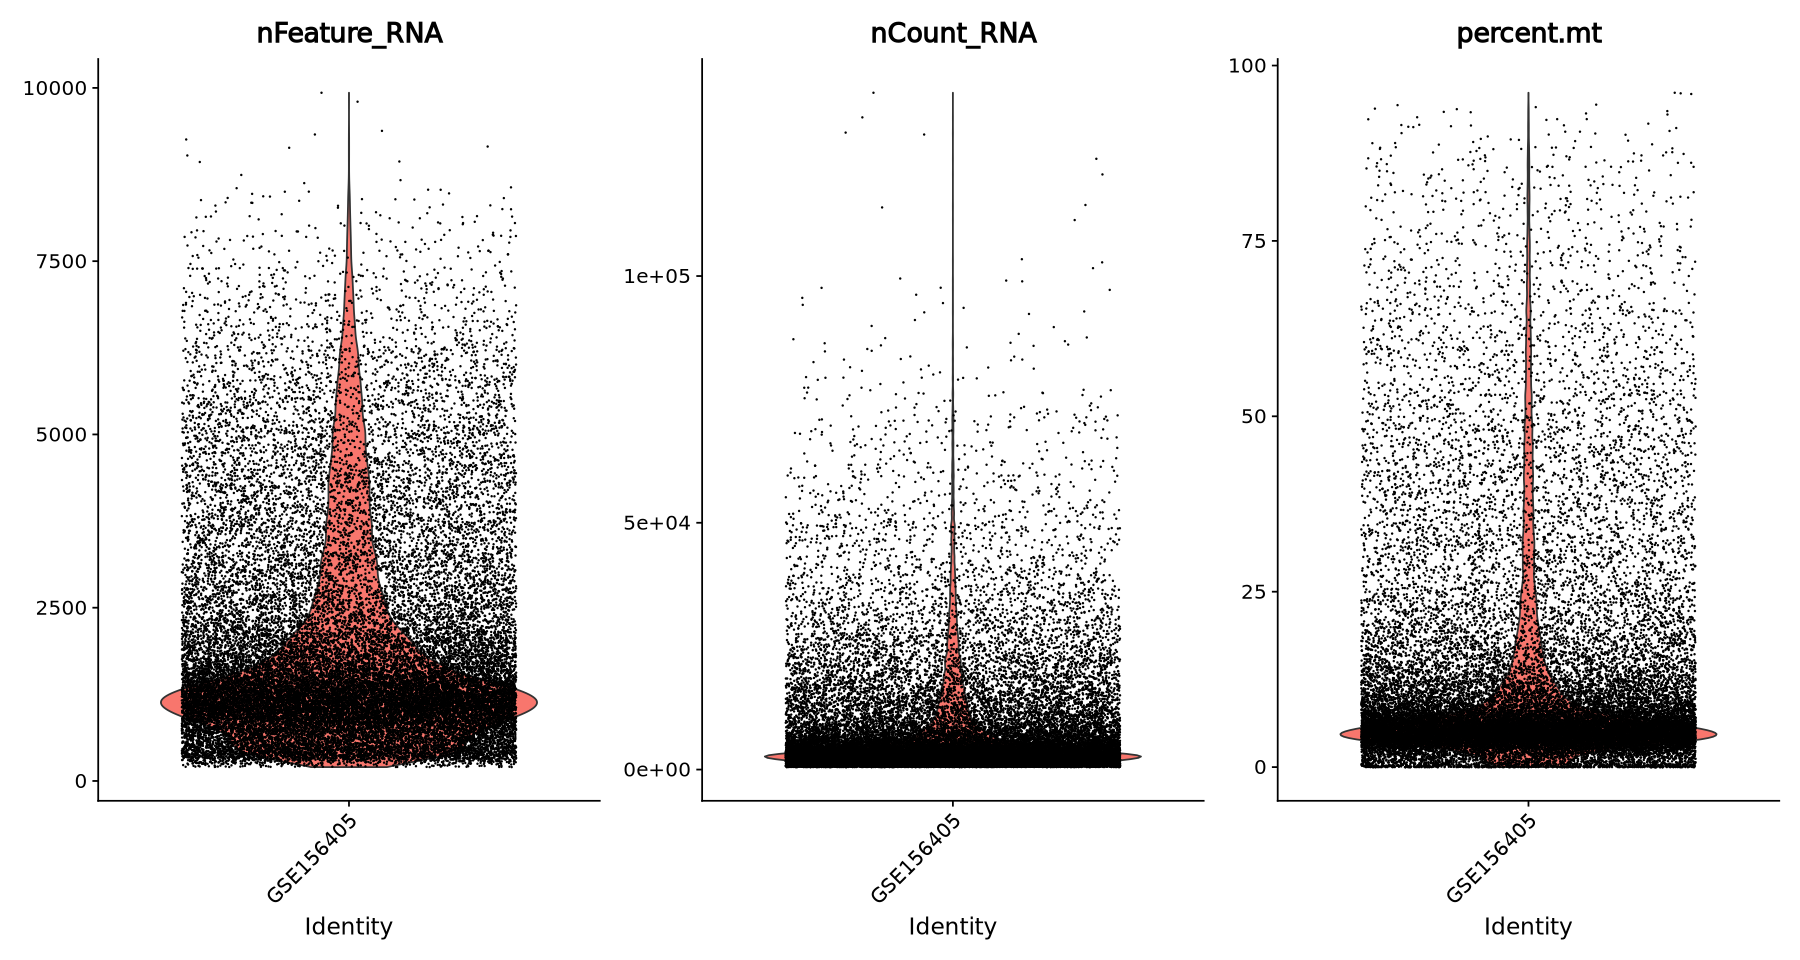

In [26]:
#QC Steps 
PDAC[["percent.mt"]] <- PercentageFeatureSet(PDAC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(PDAC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [27]:
#Normalise the data
PDAC <- NormalizeData(PDAC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8



In [28]:
#Find variable features
PDAC <- FindVariableFeatures(PDAC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8



In [29]:
#Scale the data
PDAC <- ScaleData(PDAC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [30]:
#Run PCA
PDAC <- RunPCA(PDAC, features = VariableFeatures(object = PDAC))

PC_ 1 
Positive:  LAPTM5, CD52, VIM, CORO1A, LSP1, SRGN, ITGB2, LCP1, HLA-DPB1, HLA-DPA1 
	   ALOX5AP, LTB, CD3E, APBB1IP, TYROBP, C1orf162, FCER1G, S100A4, CXCR4, GYPC 
	   LDHB, AIF1, CD3D, CD69, SPI1, PLEK, GLIPR1, NCF1, CD2, CD7 
Negative:  KRT19, KRT8, IFI27, KRT18, CLDN4, ELF3, LCN2, EPCAM, SLPI, TACSTD2 
	   SMIM22, TM4SF1, MDK, TSPAN1, MUC1, FXYD3, AGR2, PDZK1IP1, MAL2, LSR 
	   SPINT2, GPRC5A, CLDN7, MSLN, C19orf33, MALL, WFDC2, TMPRSS4, GOLM1, FHL2 
PC_ 2 
Positive:  CD68, AIF1, CD14, SPI1, NCF2, TYROBP, CST3, IGSF6, PSAP, CTSB 
	   GRN, FTL, GPNMB, FCER1G, NPC2, LINC01272, FCGR2A, CFD, MS4A7, S100A9 
	   C1QA, SLC11A1, GPX1, VCAN, RNF130, PILRA, C1QC, MS4A6A, CTSD, LILRB4 
Negative:  CD3E, CD3D, LTB, CD2, CD7, TRBC2, CCL5, GZMA, CD247, CD69 
	   TRBC1, CTSW, IL7R, CST7, CD27, LDHB, NKG7, MT-ND4L, GZMK, KLRB1 
	   CORO1A, PRF1, CD8A, IL2RB, HOPX, CD8B, CCR7, KLRD1, GZMH, HIST1H4C 
PC_ 3 
Positive:  TSPAN8, LYZ, GPX2, LGALS4, PHGR1, CYSTM1, PRSS3, CTSE, TMEM45B, CLDN18 
	   FA

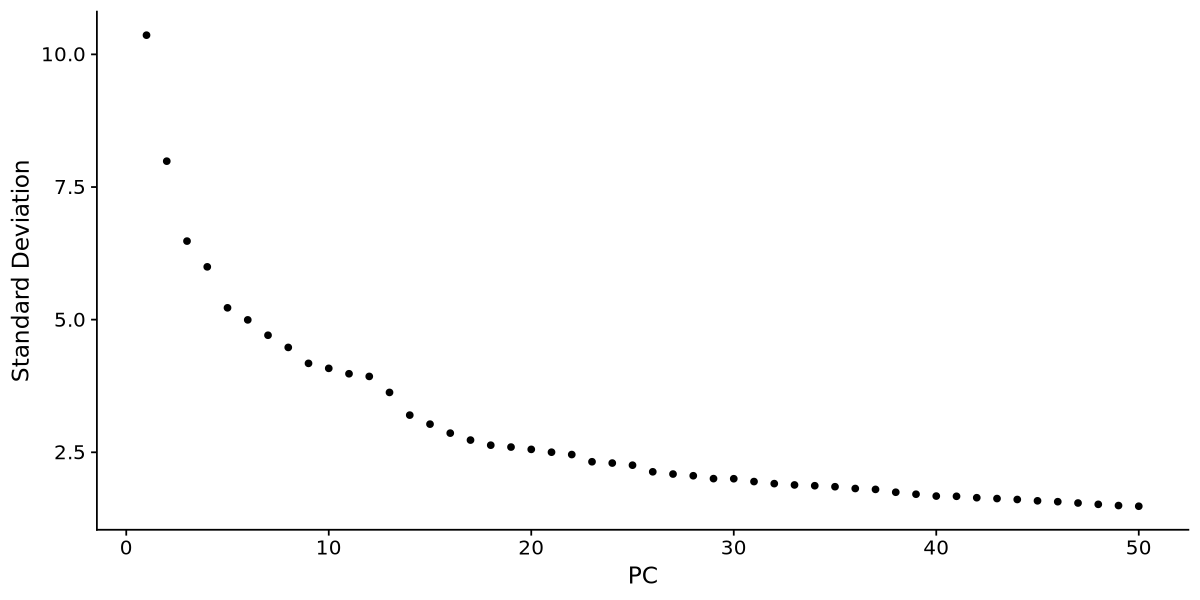

In [31]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(PDAC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [44]:
#Find neighbours (make sure number matches no. features chosen above)
PDAC <- FindNeighbors(PDAC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [45]:
#Run UMAP
PDAC <- RunUMAP(PDAC, dims = 1:40)

11:22:45 UMAP embedding parameters a = 0.9922 b = 1.112

11:22:45 Read 31108 rows and found 40 numeric columns

11:22:45 Using Annoy for neighbor search, n_neighbors = 30

11:22:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|



*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:22:48 Writing NN index file to temp file /scratch/temp/9631153/RtmpUzdteD/file28ea2f65d44f10

11:22:48 Searching Annoy index using 1 thread, search_k = 3000

11:22:58 Annoy recall = 100%

11:22:58 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:22:59 Initializing from normalized Laplacian + noise (using RSpectra)

11:23:01 Commencing optimization for 200 epochs, with 1373332 positive edges

11:23:12 Optimization finished



In [50]:
#Cluster, resolution here set to 0.2
PDAC <- FindClusters(PDAC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31108
Number of edges: 1143568

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9664
Number of communities: 18
Elapsed time: 5 seconds


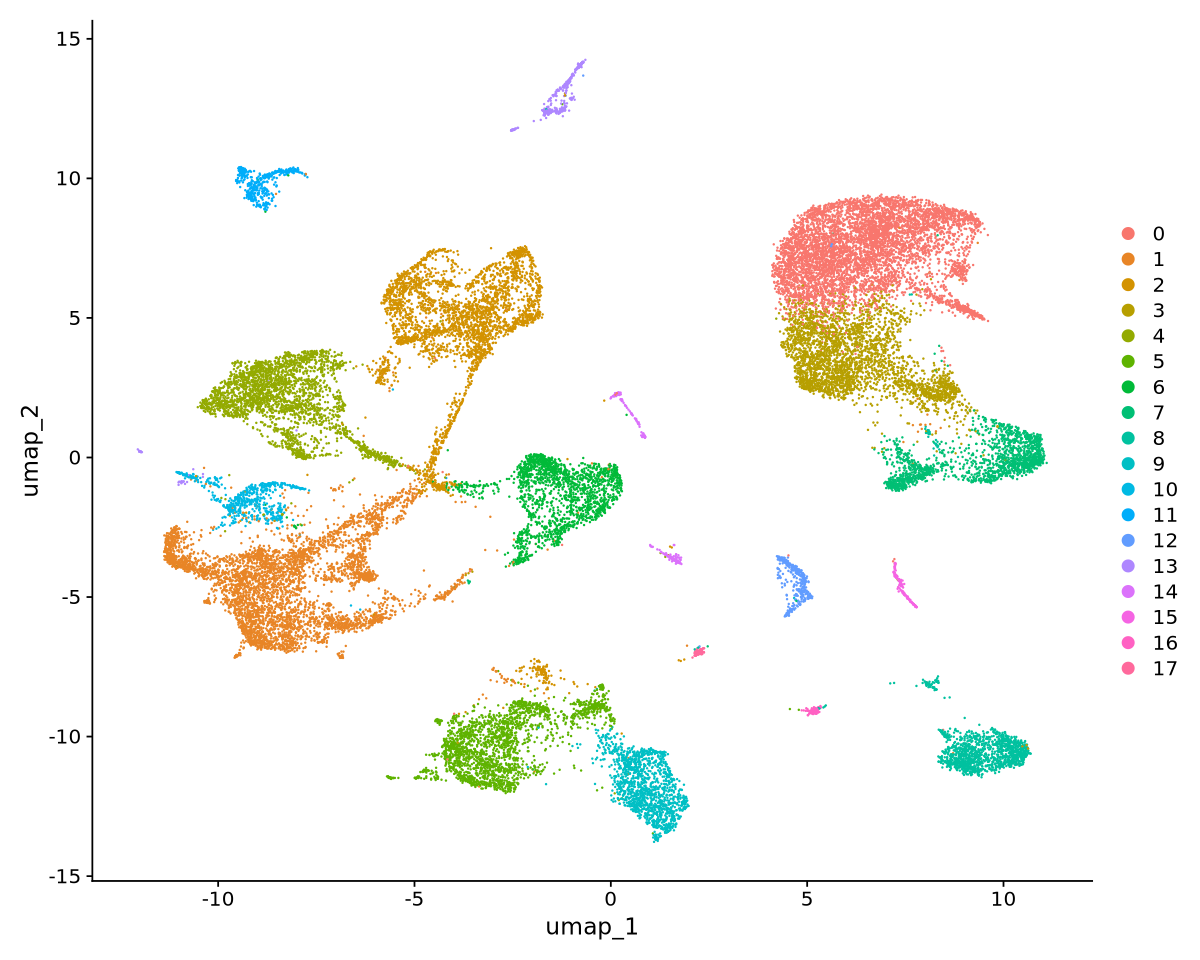

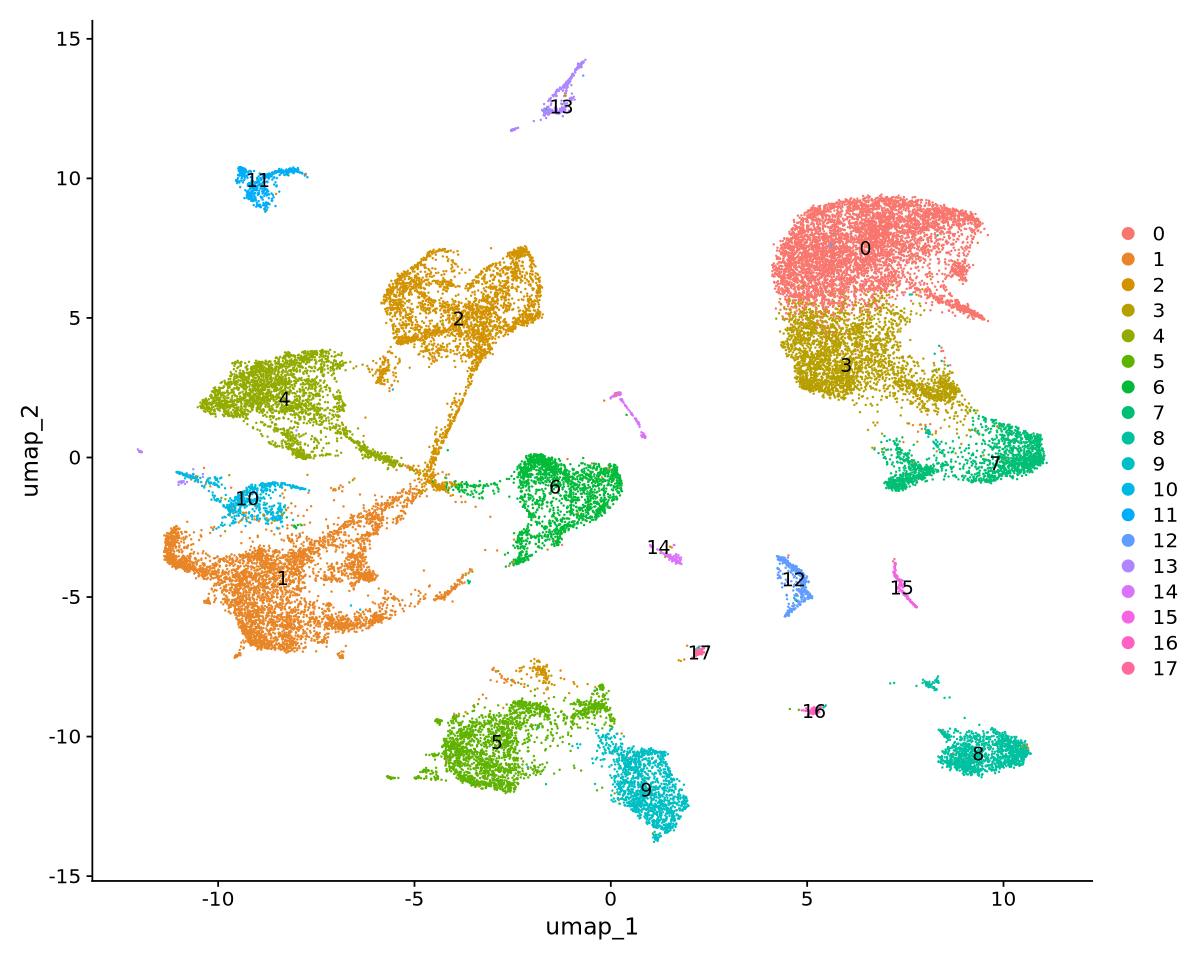

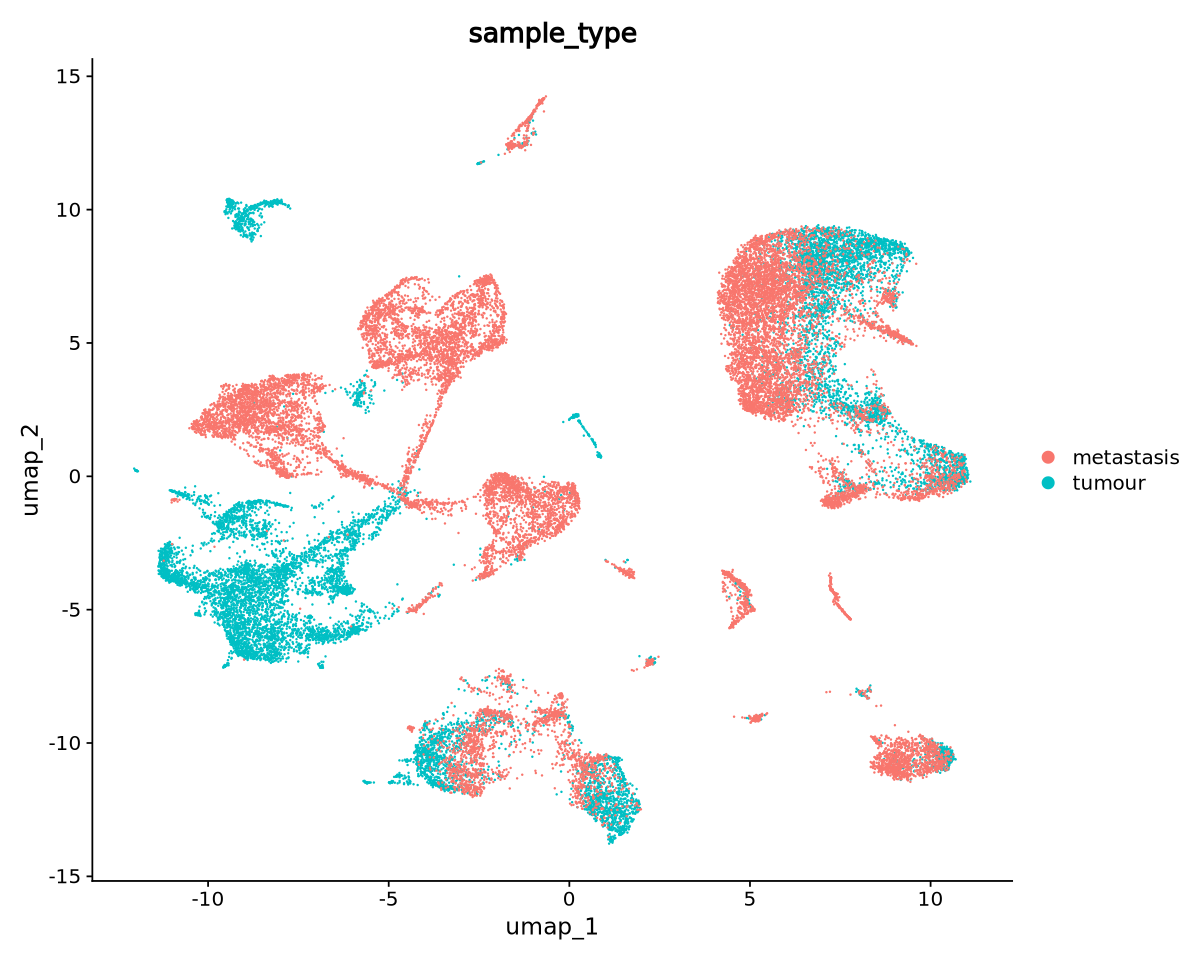

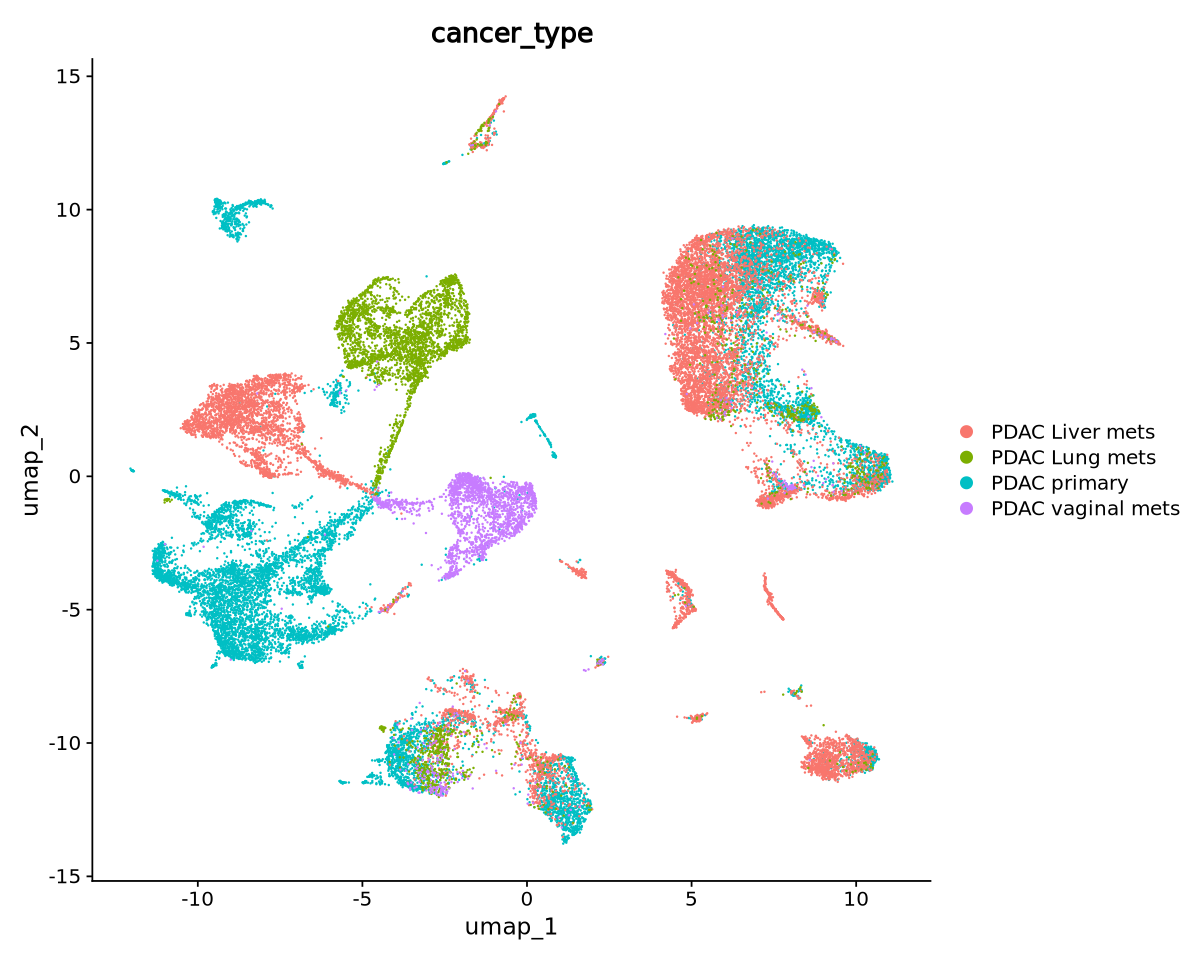

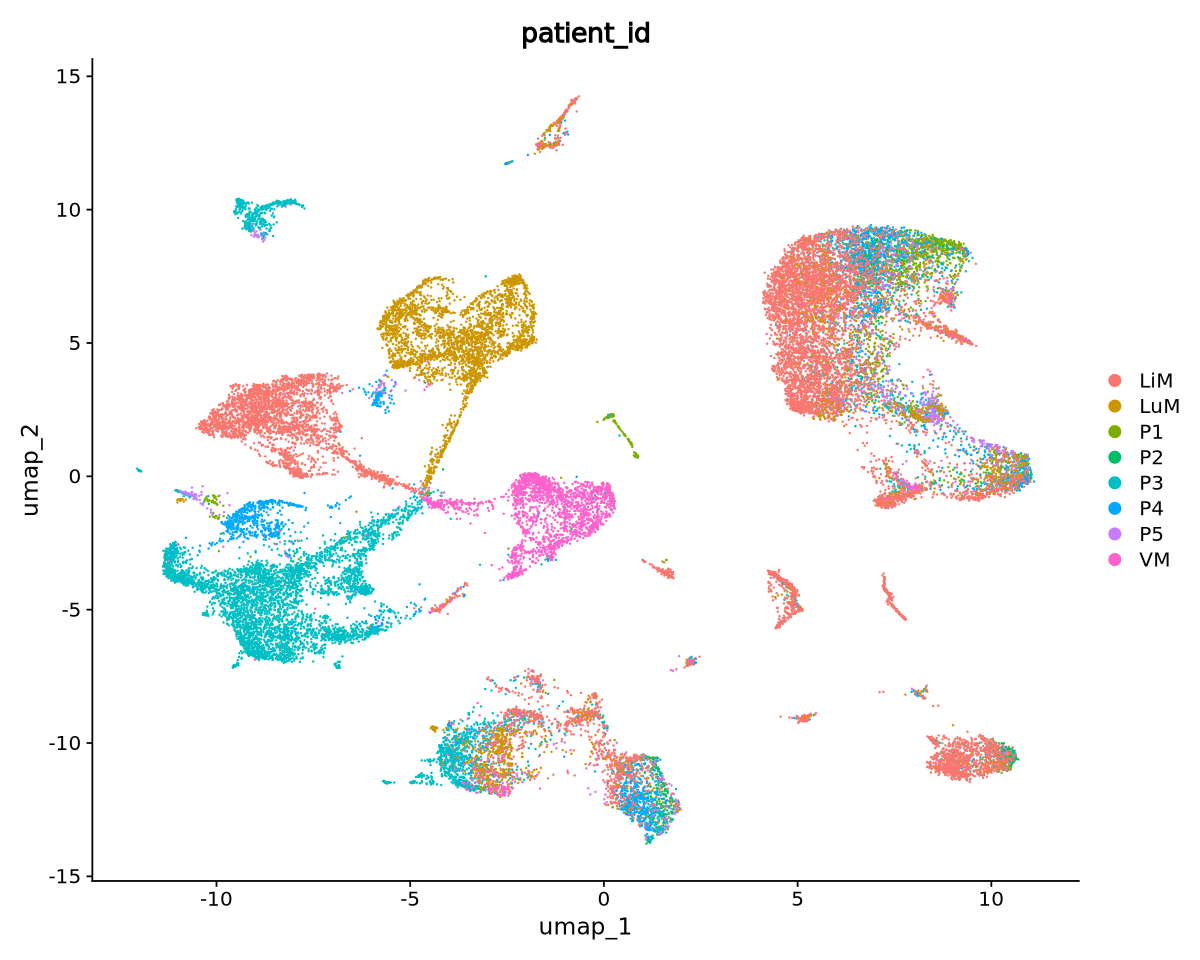

In [51]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(PDAC, reduction = "umap")
DimPlot(PDAC, reduction = "umap", label=TRUE)
DimPlot(PDAC, reduction = "umap", group = "sample_type")
DimPlot(PDAC, reduction = "umap", group = "cancer_type")
DimPlot(PDAC, reduction = "umap", group = "patient_id")

In [52]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(PDAC, file = "/scratch/user/s4436039/scdata/GSE156405/GSE156405.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

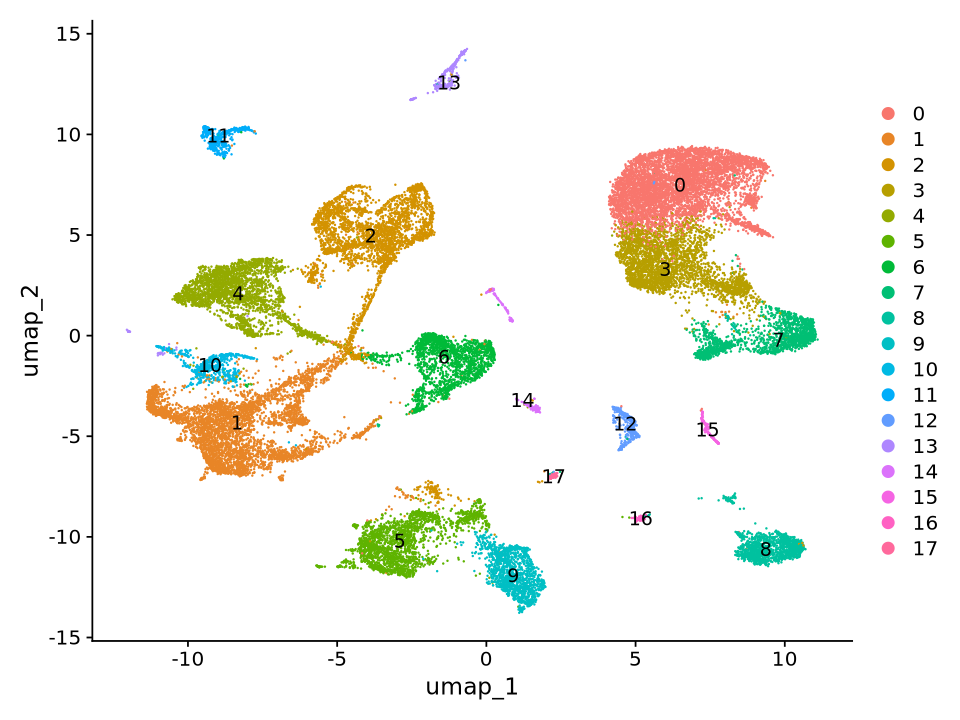

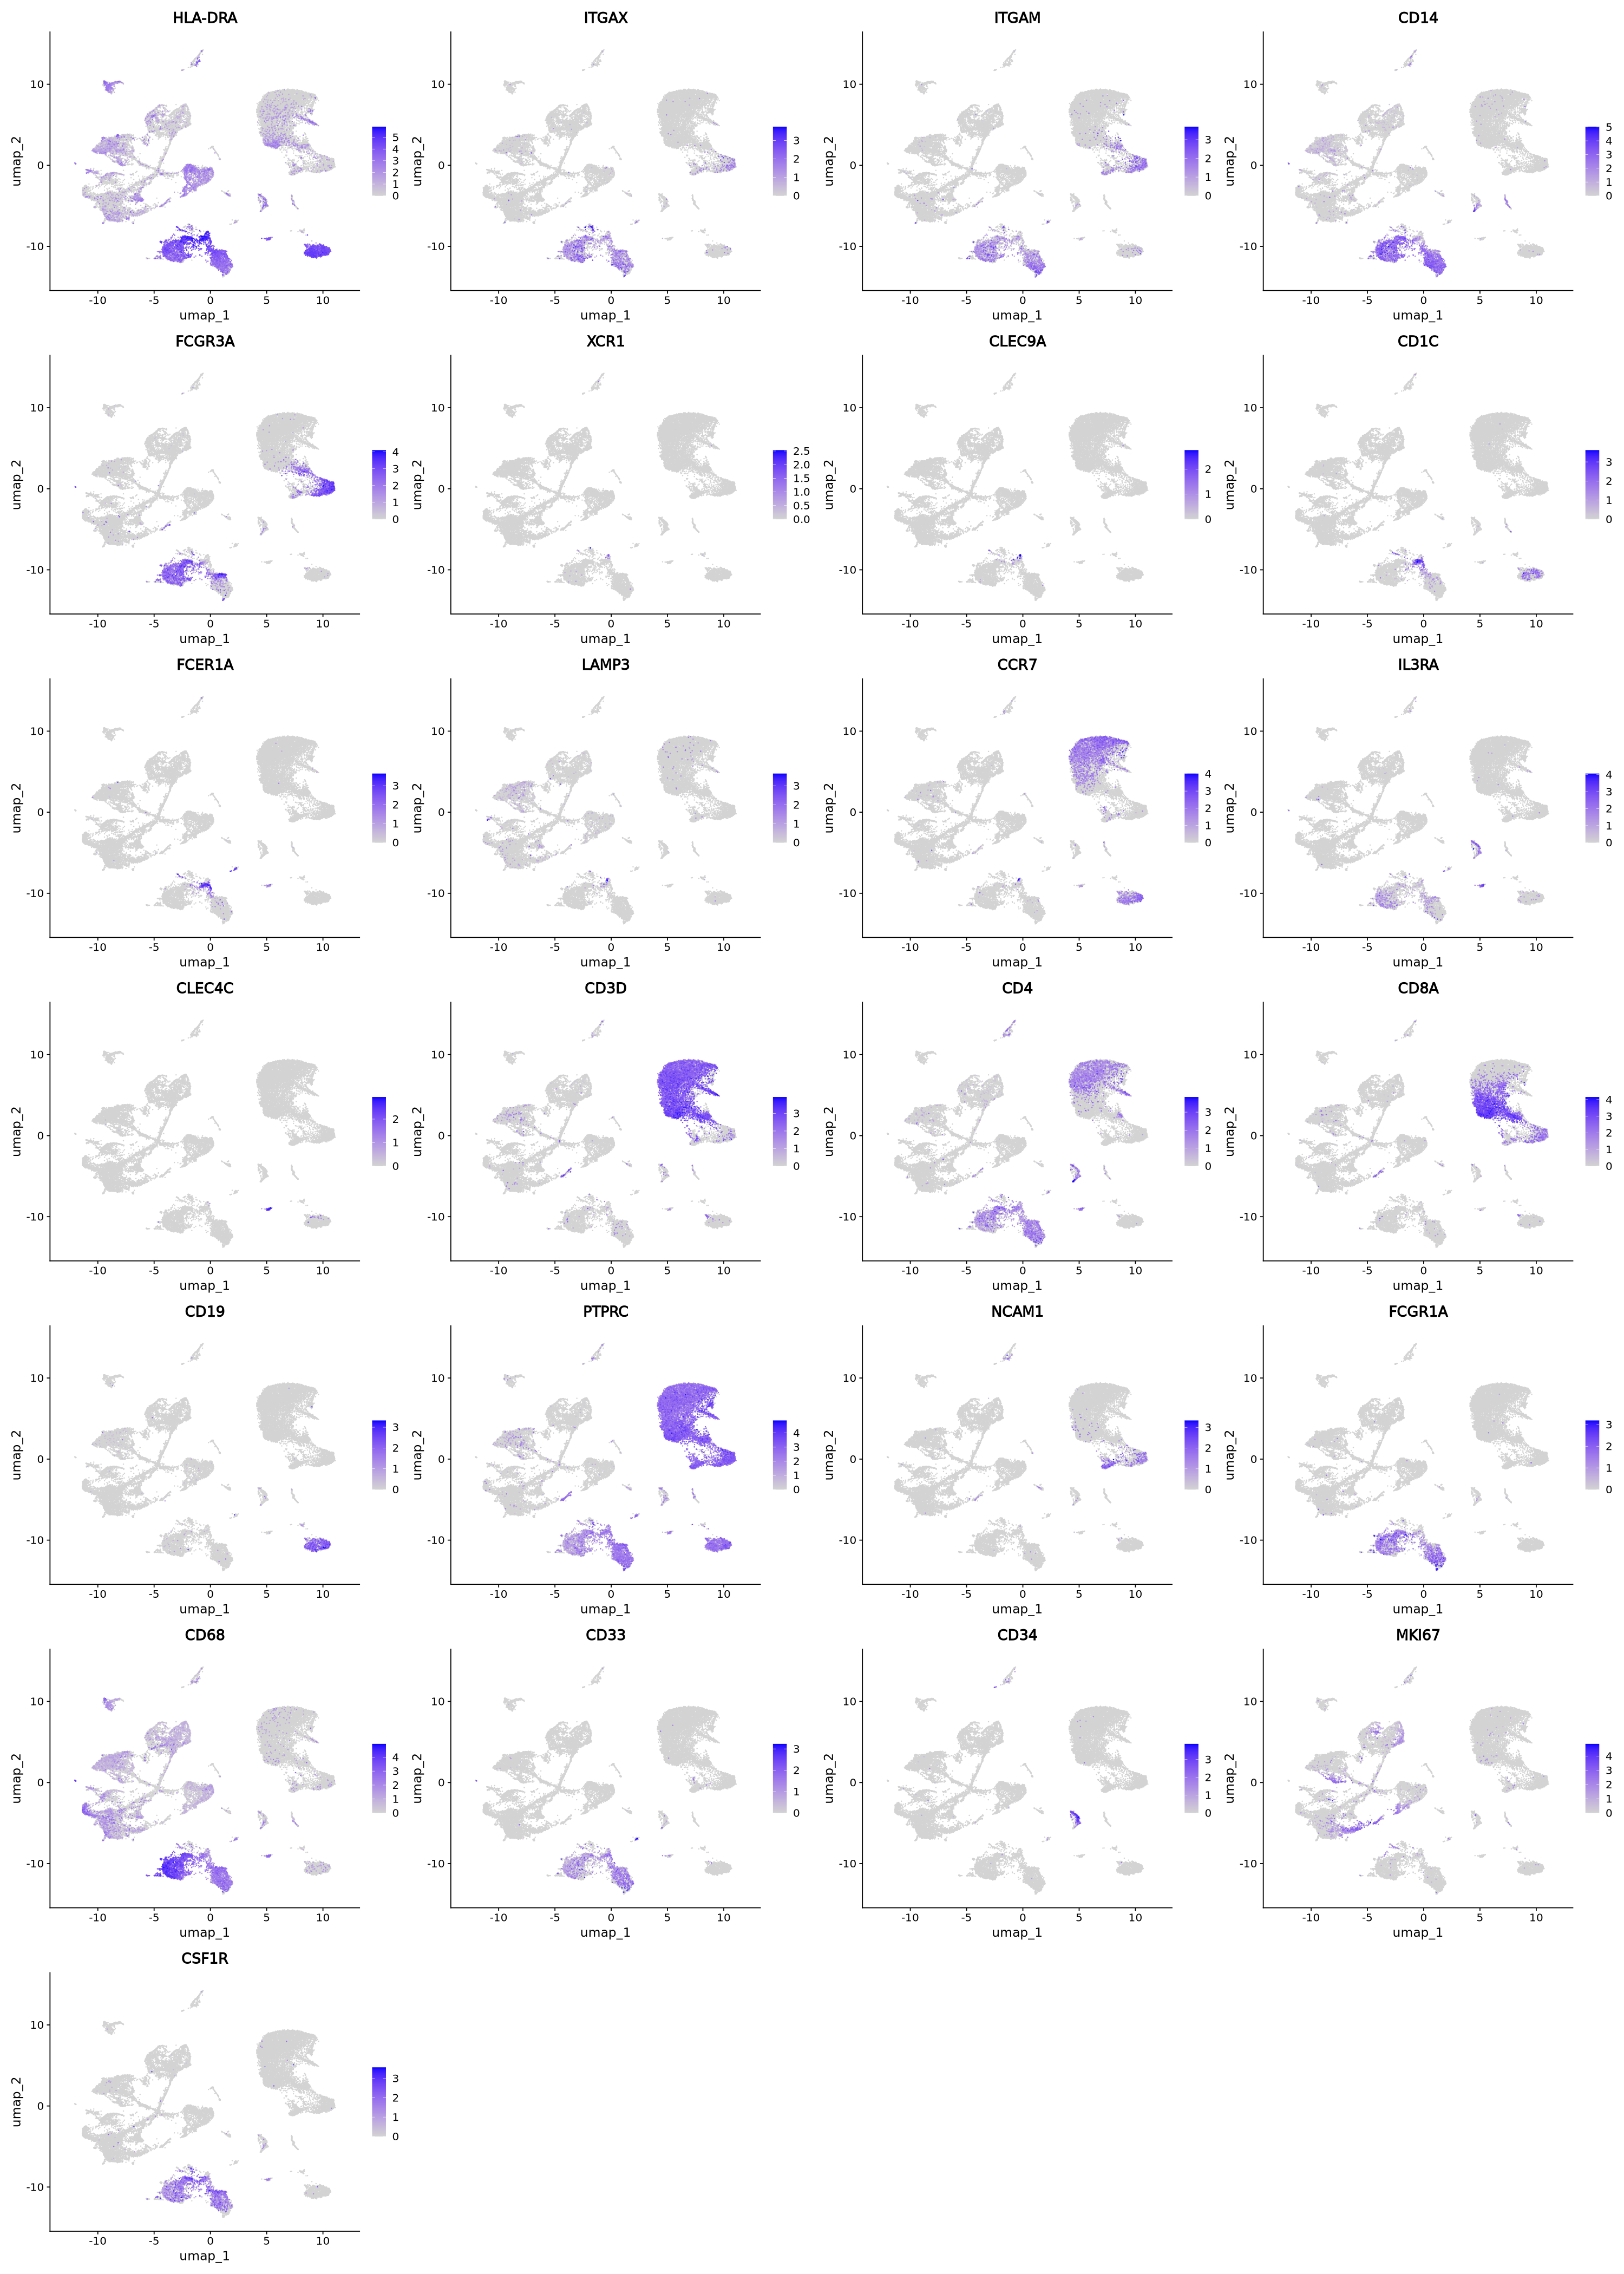

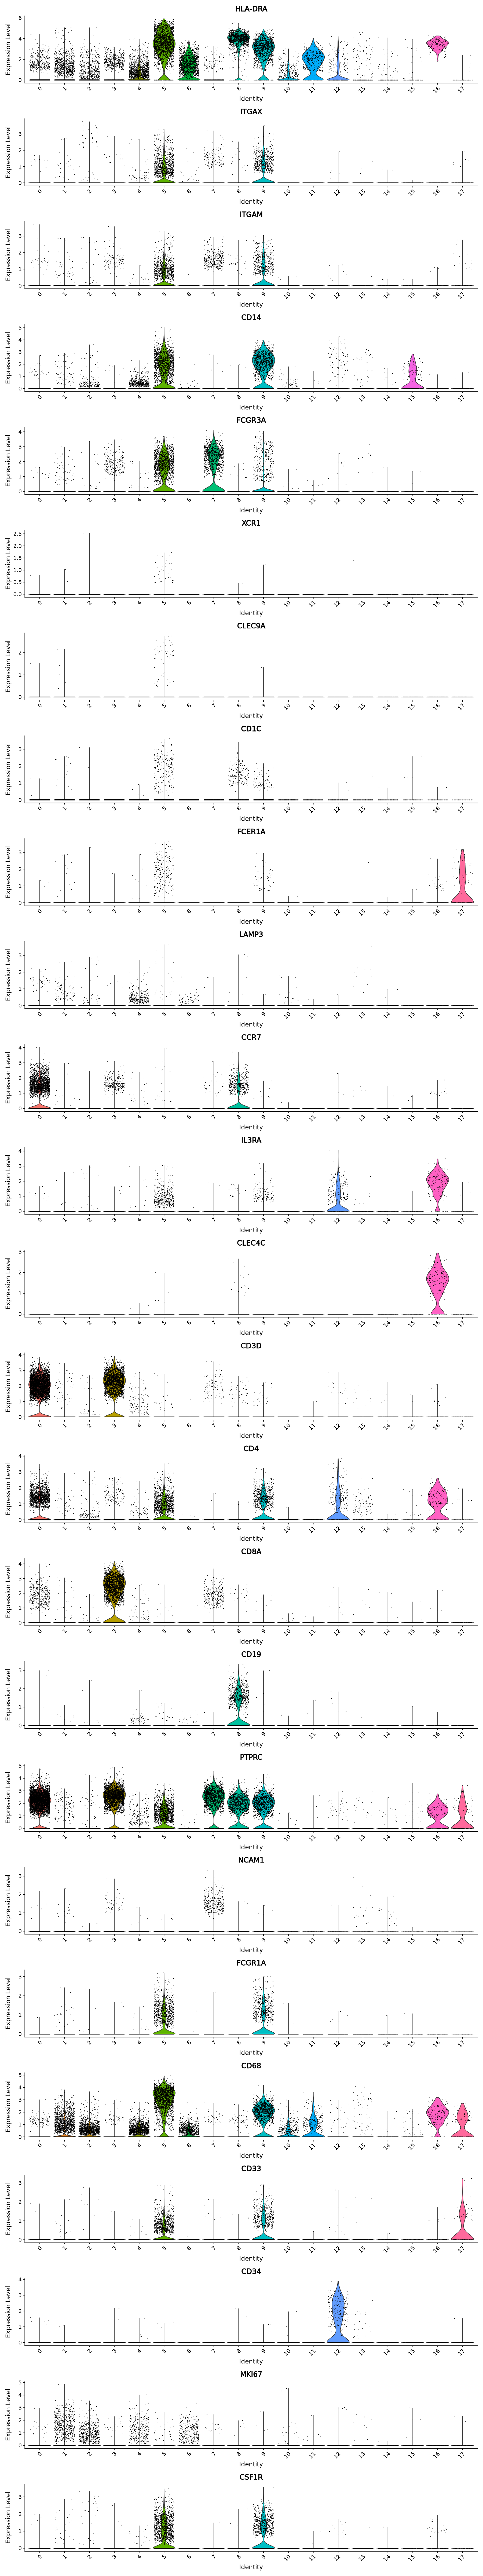

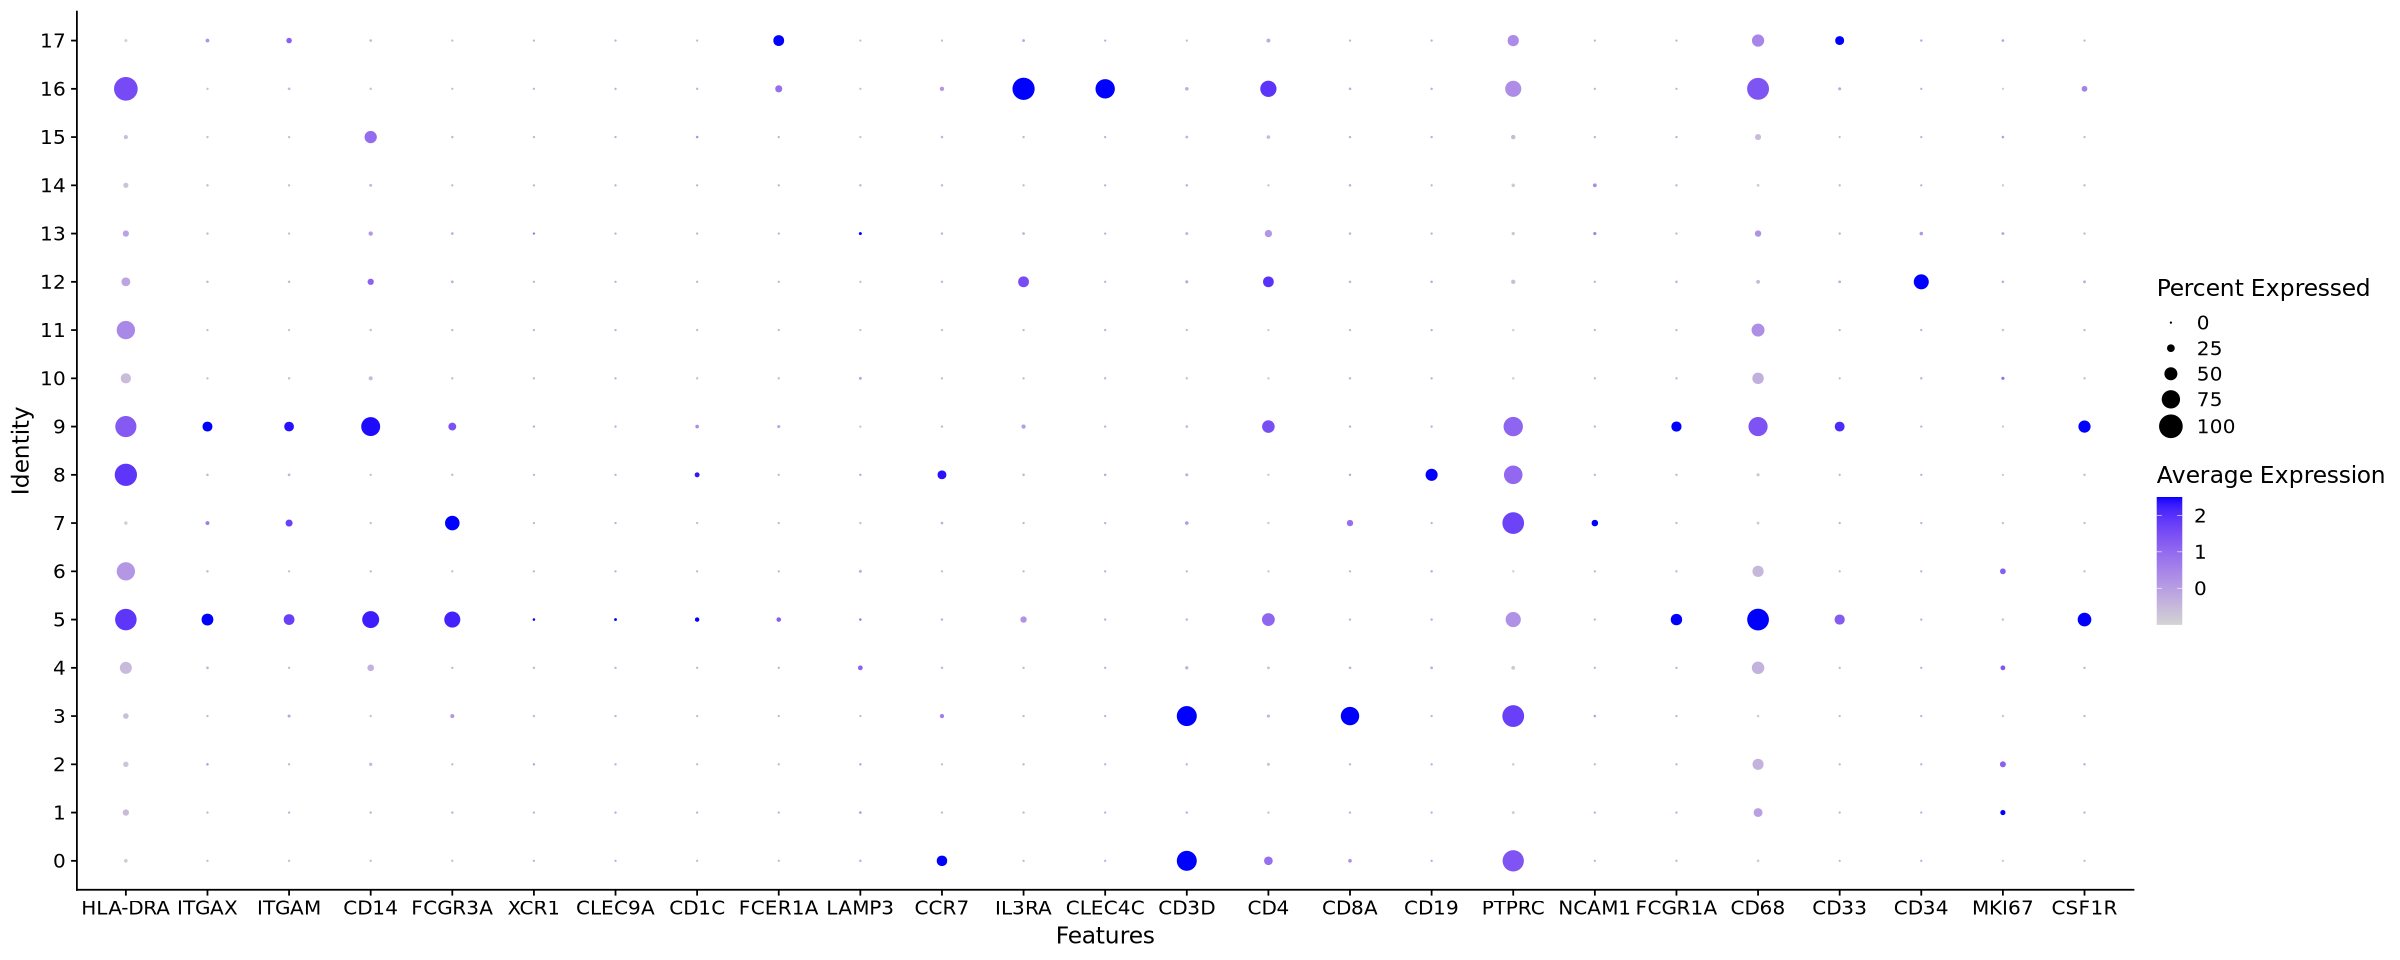

In [53]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(PDAC, reduction = "umap", label=TRUE)

options(repr.plot.height=35, repr.plot.width=25)
FeaturePlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(PDAC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like clusters 5 and 9 are the myeloid cells, now subsetting out these clusters

In [54]:
head(PDAC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 GSE156405  7115       2117        
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 GSE156405   862        436        
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 GSE156405   921        486        
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 GSE156405  1433        707        
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 GSE156405  1675        686        
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 GSE156405  3544       1190        
                                     sample_type cancer_type  patient_id
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 tumour      PDAC primary P1        
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 tumour      PDAC primary P1        
                                     sample_id                 percent.mt
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 GSE156405_PDAC_Primary_P1  4.286718 
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 GSE156405_PDAC_Primary_P1 29.118329 
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 GSE156405_PDAC_Primary_P1  7.491857 
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 GSE156405_PDAC_Primary_P1  7.257502 
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 GSE156405_PDAC_Primary_P1  4.059701 
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 GSE156405_PDAC_Primary_P1  4.796840 
                                     RNA_snn_res.0.2 seurat_clusters
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 5               5              
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 2               2              
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 3               3              
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 3               3              
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 0               0              
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 0               0              
                                     graph_res.0.2 RNA_snn_res.0.3
GSE156405_PDAC_P1_AAACCTGGTTCCCTTG-1 2             5              
GSE156405_PDAC_P1_AAACGGGCAATCCGAT-1 2             11             
GSE156405_PDAC_P1_AAACGGGTCGAATCCA-1 3             2              
GSE156405_PDAC_P1_AAAGATGTCCACTCCA-1 3             2              
GSE156405_PDAC_P1_AAAGATGTCTGCGTAA-1 0             0              
GSE156405_PDAC_P1_AAAGCAAAGACAAAGG-1 0             0

In [55]:
myeloid_PDAC <- subset(PDAC, subset = RNA_snn_res.0.2 %in% c("5", "9"))

In [56]:
PDAC
myeloid_PDAC

An object of class Seurat 
33694 features across 31108 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
33694 features across 3621 samples within 1 assay 
Active assay: RNA (33694 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [57]:
saveRDS(myeloid_PDAC, "/scratch/user/s4436039/scdata/GSE156405/GSE156405_myeloid.RDS")

#### Following the above then need to move entire GSE156405 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE156405/ /QRISdata/Q5935/nikita/scdata/GSE156405

rsync -azvhp /QRISdata/Q5935/nikita/scdata/PRJNA907381/ /scratch/user/s4436039/scdata/PRJNA907381
```